<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/5%20-%20Reti%20Neurali%20Convoluzionali/convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ConvNet: Reti Neurali Convoluzionali

In [4]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout

from tensorflow.keras.layers import MaxPooling2D

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import cv2

In [2]:
dataset = tfds.load('malaria', split='train', shuffle_files=True)

In [5]:
NUM_SAMPLES = 10000
IMG_SIZE = (150, 150)

In [6]:
def load_data(dataset, num_samples=None):
  images = []
  labels = []

  for i, example in enumerate(tfds.as_numpy(dataset)):

    if(num_samples!=None and i>=num_samples):
      break

    img = example["image"]
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(img)
    labels.append(example["label"])

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

images, labels = load_data(dataset, num_samples=NUM_SAMPLES)
num_classes = np.unique(labels).shape[0]

1


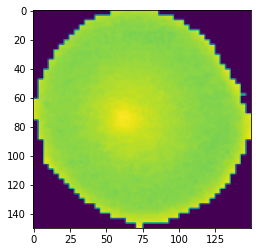

In [8]:
plt.imshow(images[0])
print(labels[0])

In [13]:
X = images/255
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## La nostra prima ConvNet

In [19]:
model = tf.keras.models.Sequential()

model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 8)       40        
_________________________________________________________________
flatten_3 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 180001    
Total params: 180,041
Trainable params: 180,041
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
16/16 [==============================] - 2s 127ms/step - loss: 2.6902 - accuracy: 0.4983
Epoch 2/10
16/16 [==============================] - 2s 111ms/step - loss: 0.8889 - accuracy: 0.5310
Epoch 3/10
16/16 [==============================] - 2s 110ms/step - loss: 0.6862 - accuracy: 0.5717
Epoch 4/10
16/16 [==============================] - 2s 109ms/step - loss: 0.6547 - accuracy: 0.6059
Epoch 5/10
16/16 [==============================] - 2s 109ms/step - loss: 0.6398 - accuracy: 0.6280
Epoch 6/10
16/16 [==============================] - 2s 111ms/step - loss: 0.6154 - accuracy: 0.6736
Epoch 7/10
16/16 [==============================] - 2s 110ms/step - loss: 0.5755 - accuracy: 0.7084
Epoch 8/10
16/16 [==============================] - 2s 109ms/step - loss: 0.5624 - accuracy: 0.7044
Epoch 9/10
16/16 [==============================] - 2s 111ms/step - loss: 0.5378 - accuracy: 0.7344
Epoch 10/10
16/16 [==============================] - 2s 110ms/step - loss: 0.5112 - accuracy: 0.7625

In [23]:
metrics_train = model.evaluate(X_train, y_train, verbose=0)
metrics_test = model.evaluate(X_test, y_test, verbose=0)
print("Train Set: Accuracy=%.2f, Log Loss=%.4f" % (metrics_train[1], metrics_train[0]))
print("Test Set: Accuracy=%.2f, Log Loss=%.4f" % (metrics_test[1], metrics_test[0]))

Train Set: Accuracy=0.78, Log Loss=0.4905
Test Set: Accuracy=0.68, Log Loss=0.5866


## MaxPooling

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=30, batch_size=512)

Epoch 1/30
16/16 [==============================] - 5s 284ms/step - loss: 0.6926 - accuracy: 0.5366
Epoch 2/30
16/16 [==============================] - 4s 274ms/step - loss: 0.6676 - accuracy: 0.5981
Epoch 3/30
16/16 [==============================] - 4s 276ms/step - loss: 0.6489 - accuracy: 0.6246
Epoch 4/30
16/16 [==============================] - 4s 276ms/step - loss: 0.6279 - accuracy: 0.6425
Epoch 5/30
16/16 [==============================] - 4s 276ms/step - loss: 0.6051 - accuracy: 0.6691
Epoch 6/30
16/16 [==============================] - 4s 278ms/step - loss: 0.5924 - accuracy: 0.6808
Epoch 7/30
16/16 [==============================] - 4s 276ms/step - loss: 0.5802 - accuracy: 0.6934
Epoch 8/30
16/16 [==============================] - 4s 275ms/step - loss: 0.5666 - accuracy: 0.7156
Epoch 9/30
16/16 [==============================] - 4s 275ms/step - loss: 0.5556 - accuracy: 0.7120
Epoch 10/30
16/16 [==============================] - 4s 276ms/step - loss: 0.5409 - accuracy: 0.7295

In [35]:
metrics_train = model.evaluate(X_train, y_train, verbose=0)
metrics_test = model.evaluate(X_test, y_test, verbose=0)
print("Train Set: Accuracy=%.2f, Log Loss=%.4f" % (metrics_train[1], metrics_train[0]))
print("Test Set: Accuracy=%.2f, Log Loss=%.4f" % (metrics_test[1], metrics_test[0]))

Train Set: Accuracy=0.89, Log Loss=0.3315
Test Set: Accuracy=0.85, Log Loss=0.4076
